In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [74]:
import matplotlib.pylab as pylab

params = {'axes.labelsize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'legend.fontsize': 'x-large',
          #'font.size': 16,
          'axes.titlesize': 'x-large'}
pylab.rcParams.update(params)

sns.set(font_scale=2.2)

In [75]:
BBDIR = 'bb results/'

In [76]:
df_acg_clean = pd.read_csv("adv_obs.csv",
                       index_col=0)
df_acg_adv = pd.read_csv("adv_perturbed_obs.csv",
                     index_col=0)

In [77]:
df_bb_clean = pd.read_csv(BBDIR + "clean obs.csv",
                       index_col=0)
df_bb_adv = pd.read_csv(BBDIR + "bb obs.csv",
                     index_col=0)

In [78]:
df_optimal_clean = pd.read_csv("Optimal mybb obs.csv",
                       header=None)
df_optimal_adv = pd.read_csv("Optimal mybb adv obs.csv",
                       header=None)

In [79]:
df_bb_clean.columns = df_acg_clean.columns
df_bb_adv.columns = df_acg_clean.columns
df_optimal_adv.columns = df_acg_clean.columns
df_optimal_clean.columns = df_acg_clean.columns

In [80]:
cols = df_bb_adv.columns

In [81]:
cols[6:]

Index(['outdoor_dry_bulb_temperature',
       'outdoor_dry_bulb_temperature_predicted_6h',
       'outdoor_dry_bulb_temperature_predicted_12h',
       'outdoor_dry_bulb_temperature_predicted_24h',
       'outdoor_relative_humidity', 'outdoor_relative_humidity_predicted_6h',
       'outdoor_relative_humidity_predicted_12h',
       'outdoor_relative_humidity_predicted_24h', 'diffuse_solar_irradiance',
       'diffuse_solar_irradiance_predicted_6h',
       'diffuse_solar_irradiance_predicted_12h',
       'diffuse_solar_irradiance_predicted_24h', 'direct_solar_irradiance',
       'direct_solar_irradiance_predicted_6h',
       'direct_solar_irradiance_predicted_12h',
       'direct_solar_irradiance_predicted_24h', 'carbon_intensity',
       'non_shiftable_load', 'solar_generation', 'electrical_storage_soc',
       'net_electricity_consumption', 'electricity_pricing',
       'electricity_pricing_predicted_6h', 'electricity_pricing_predicted_12h',
       'electricity_pricing_predicted_24h'],


In [82]:
def plot_rows(df1, df2, row_ids, title='Comparison of Clean and Adversarial Observations', fig_size:tuple=(50,10)):


    fig, axs = plt.subplots(1, 3, 
                            figsize=fig_size,
                            sharex=True, 
                            sharey=True,
                            )
    df_diff = (df1 - df2).abs()

    # Plot row from df1
    sns.heatmap(df1.iloc[row_ids], 
                ax=axs[0], 
                cmap='viridis',
                cbar=False)
    axs[0].set_title('Clean Observations')

    # Plot row from df2
    sns.heatmap(df2.iloc[row_ids], 
                ax=axs[1], 
                cmap='viridis',
                cbar=False
                )
    axs[1].set_title('Adversarial Observations')

    # Plot the difference
    sns.heatmap(df_diff.iloc[row_ids], 
                ax=axs[2], 
                cmap='viridis',
                vmin=0, 
                vmax=1,
                )
    axs[2].set_title('Absolute Difference')

    fig.text(0.5, -0.65, 'Features (min-max normalized)', ha='center', fontdict={'size':22})
    fig.text(0.1, 0.5, 'Time Step (hours)', va='center', rotation='vertical', fontdict={'size':22})
    fig.suptitle(title,
                 fontsize='x-large')
    plt.show()

In [83]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

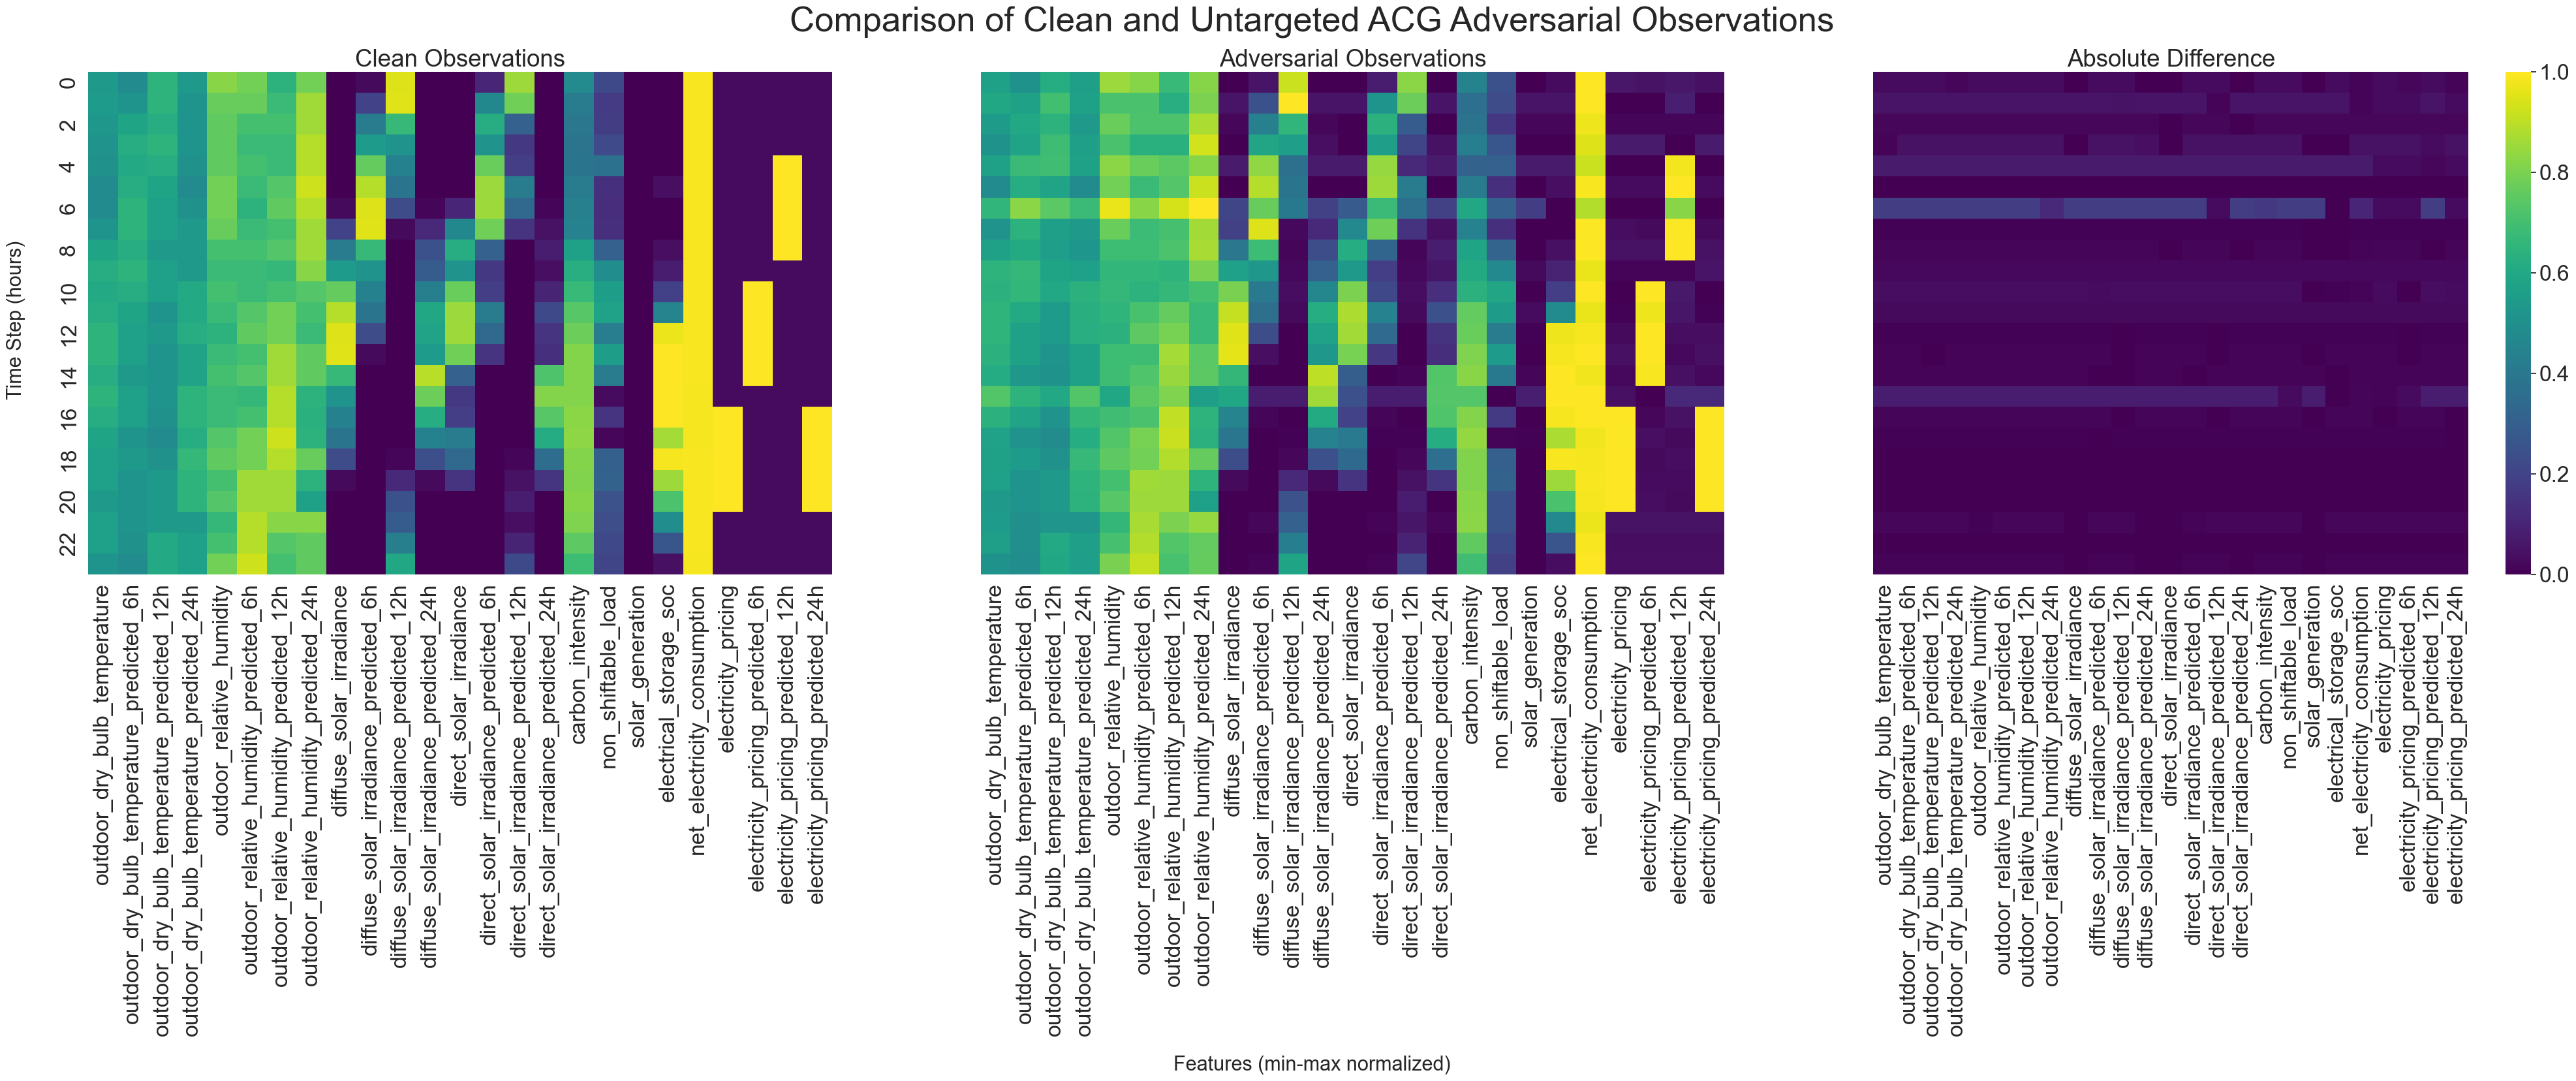

In [84]:
plot_rows(df_bb_clean[cols[6:]], df_bb_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Untargeted BB Adversarial Observations')

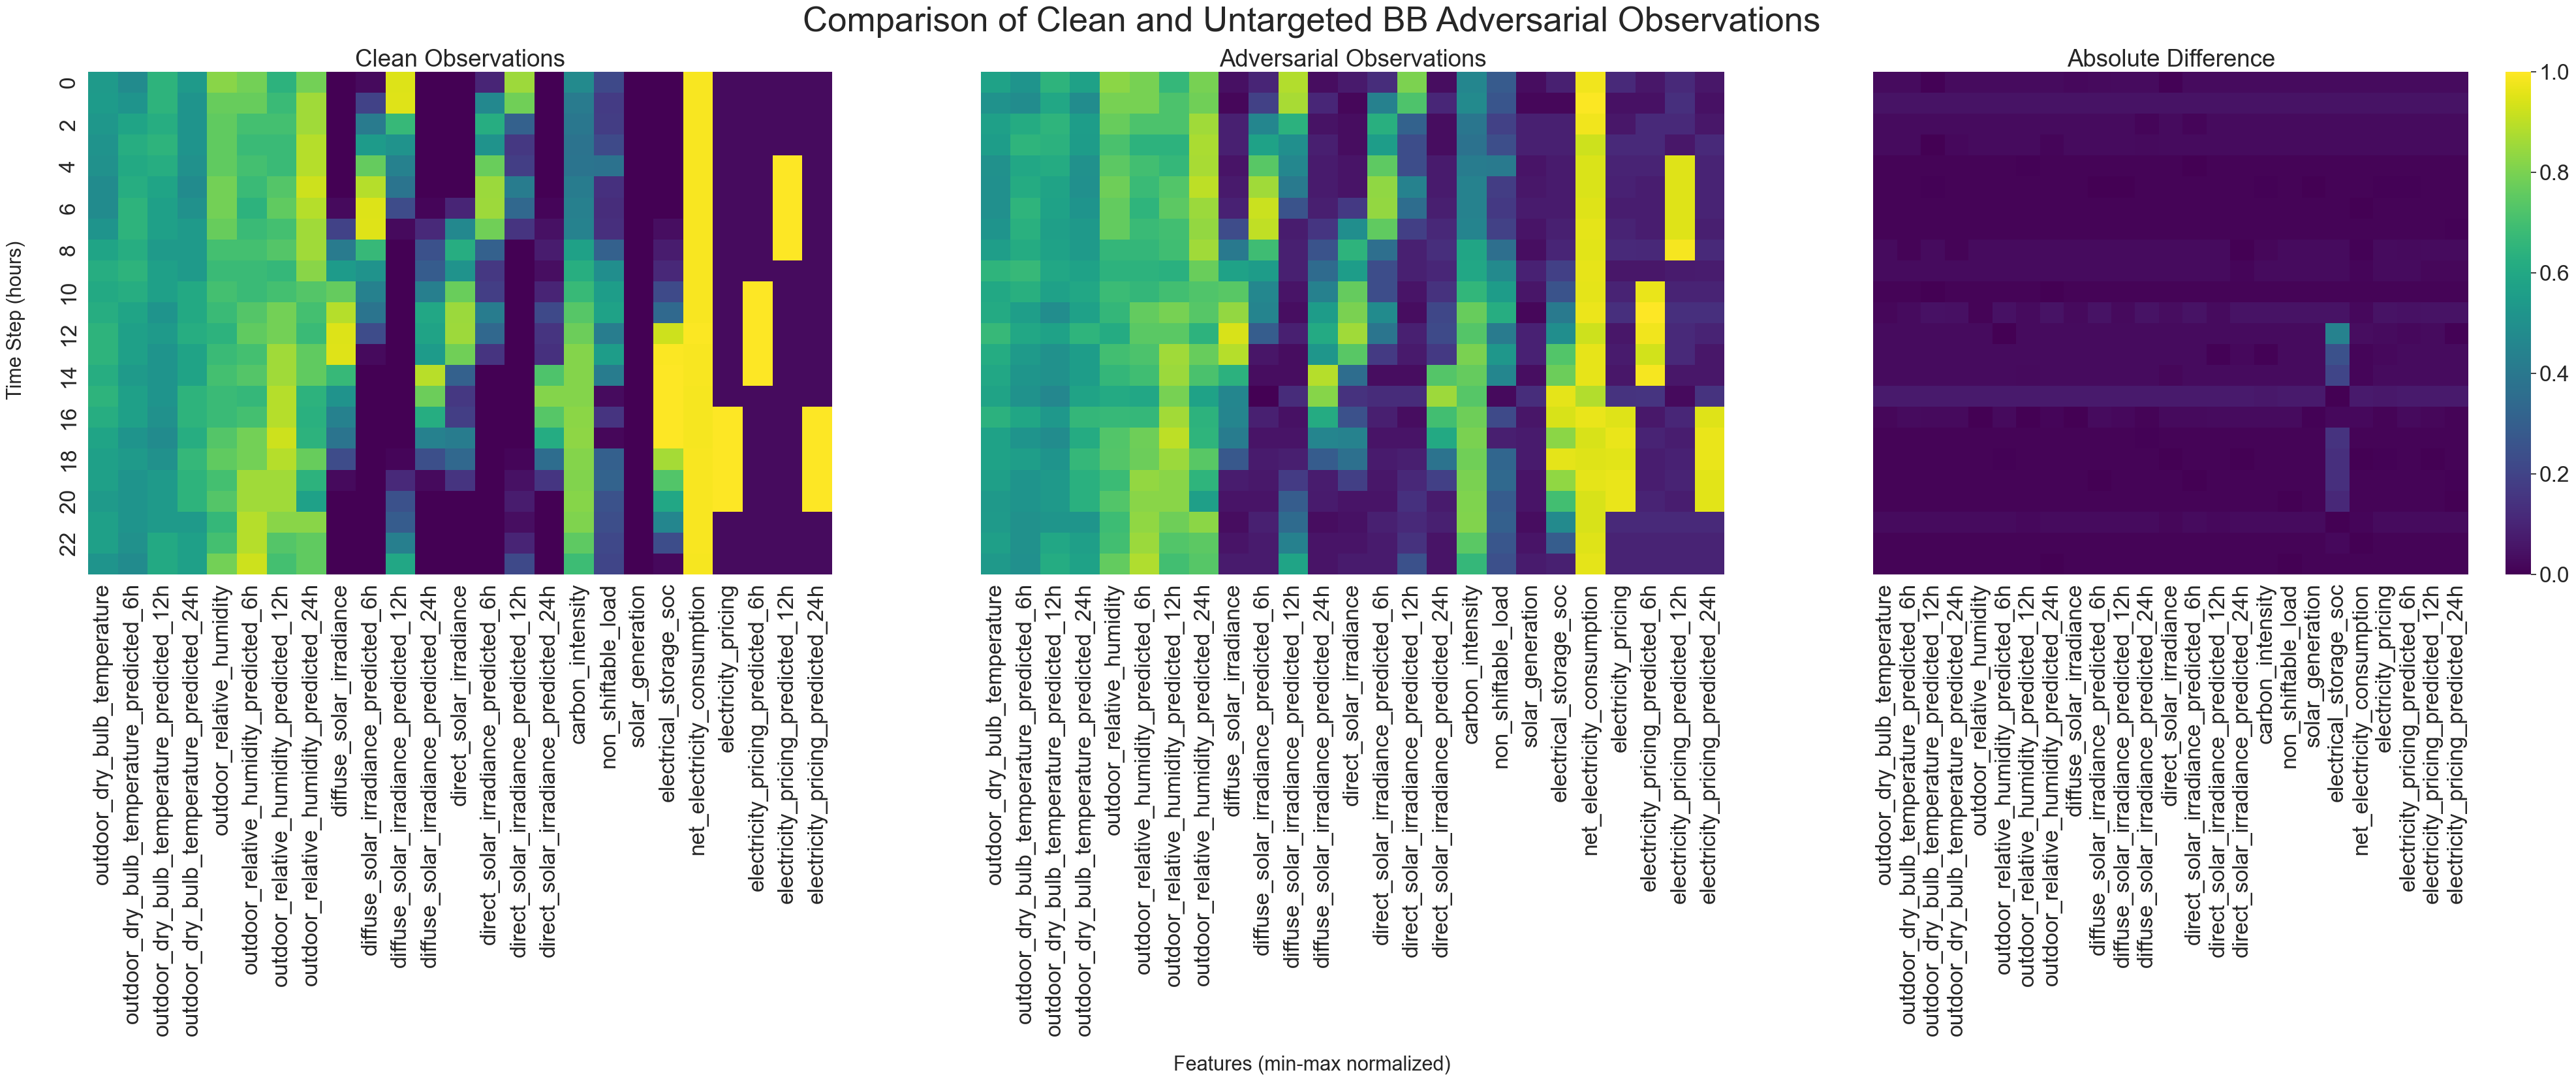

In [85]:
plot_rows(df_acg_clean[cols[6:]], df_acg_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Untargeted ACG Adversarial Observations')

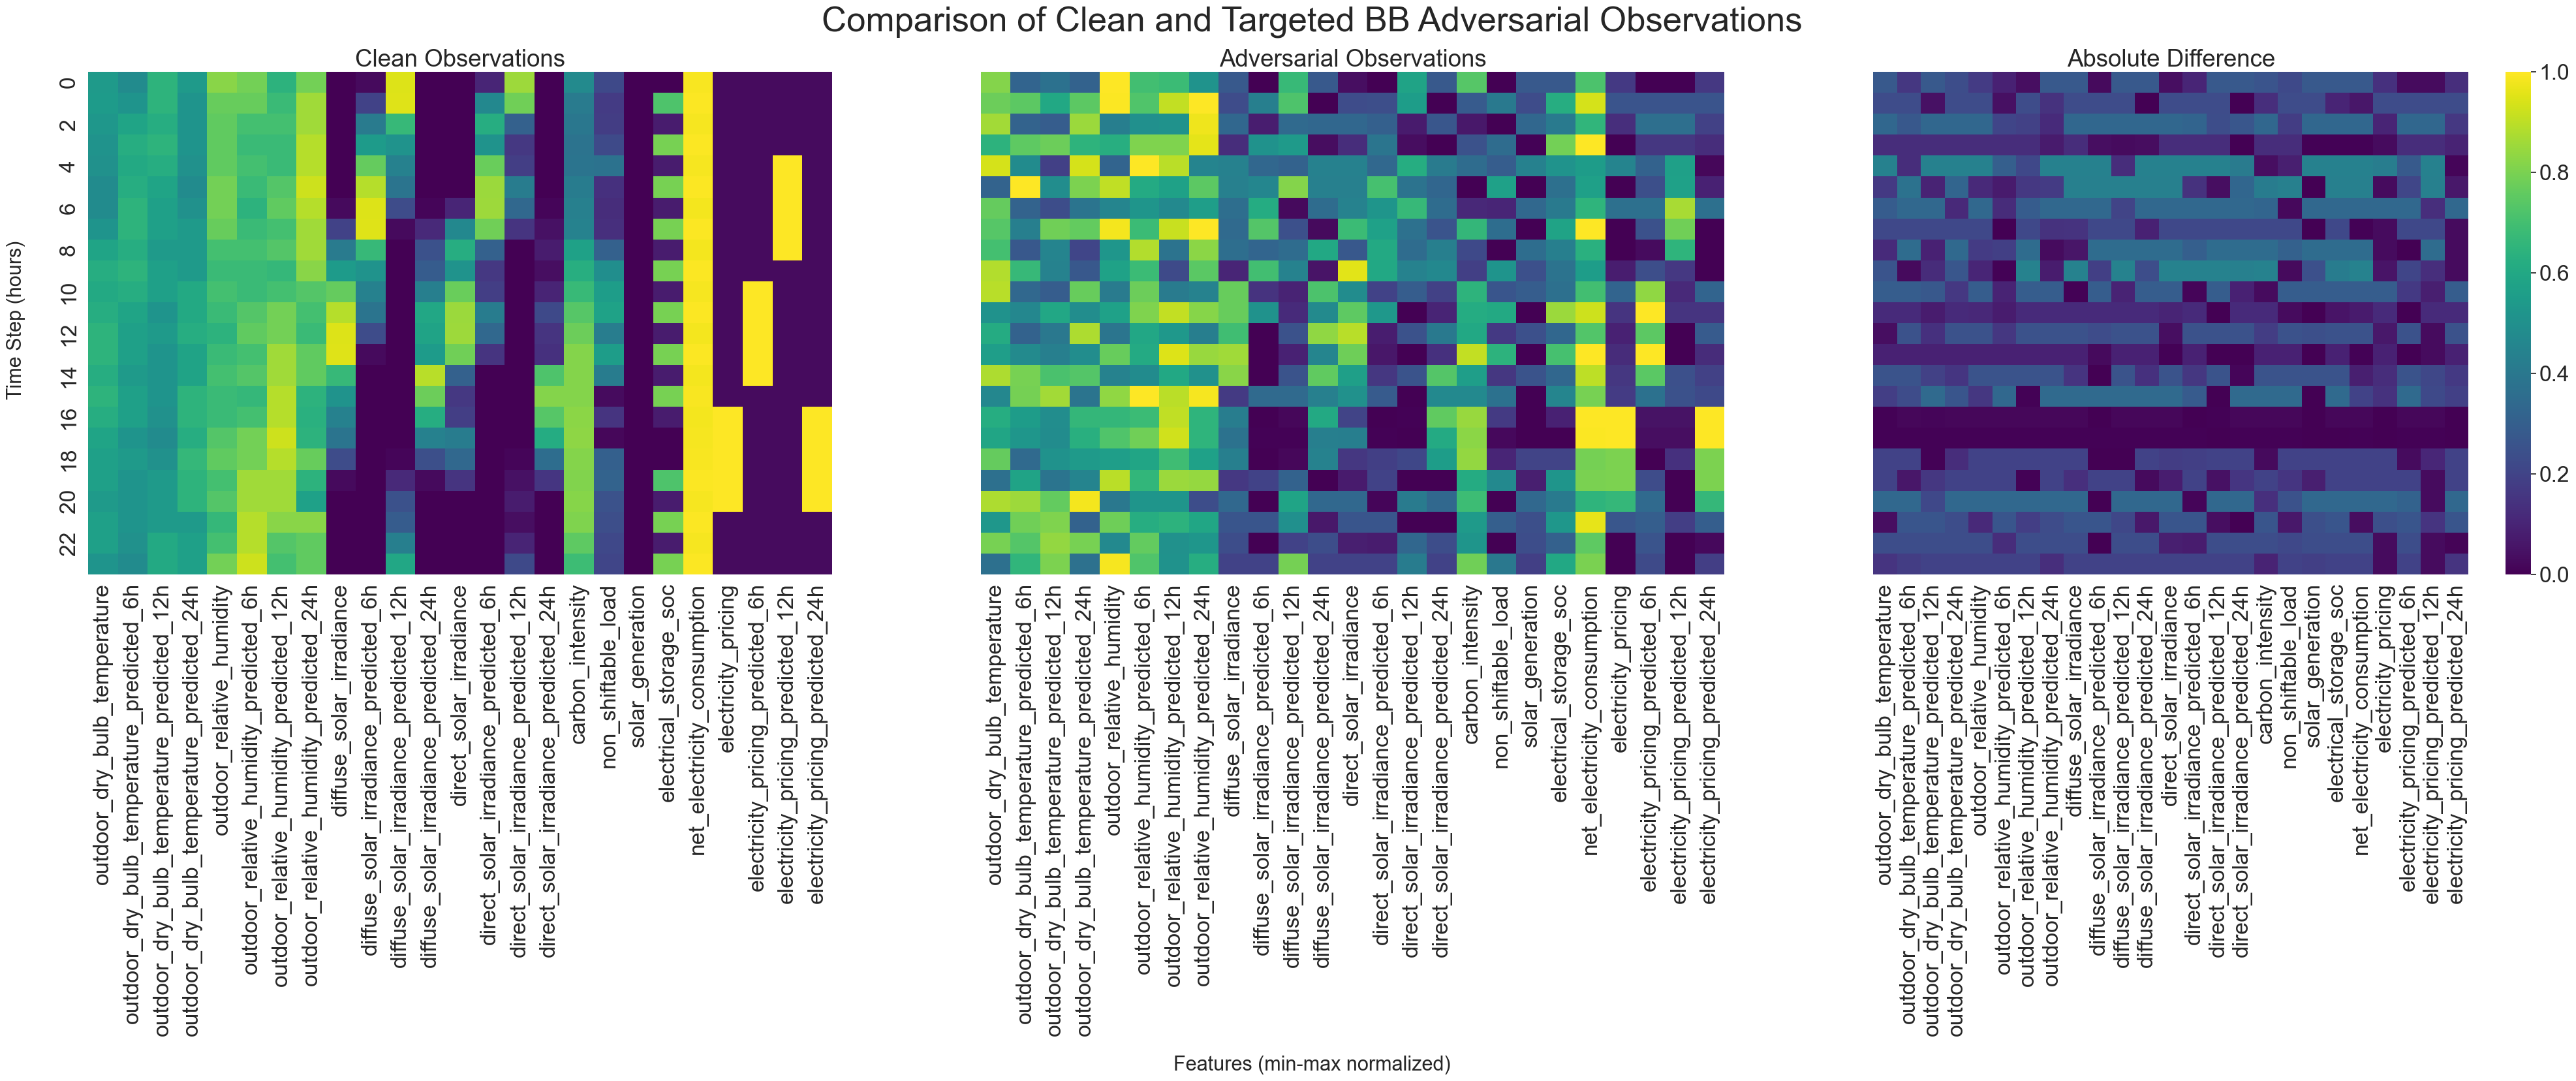

In [86]:
plot_rows(df_optimal_clean[cols[6:]], df_optimal_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Targeted BB Adversarial Observations')

In [95]:
def plot_columns(df1, df2, row_ids, title='Comparison of Clean and Adversarial Observations', fig_size:tuple=(10,40)):

    fig, axs = plt.subplots(3, 1, 
                            figsize=fig_size,
                            sharex=True, 
                            sharey=True,
                            )
    df_diff = (df1 - df2).abs()

    # Plot row from df1
    sns.heatmap(df1.iloc[row_ids].T, 
                ax=axs[0], 
                cmap='viridis',
                cbar=False)
    axs[0].set_title('Clean Observations')

    # Plot row from df2
    sns.heatmap(df2.iloc[row_ids].T, 
                ax=axs[1], 
                cmap='viridis',
                cbar=False
                )
    axs[1].set_title('Adversarial Observations')

    # Plot the difference
    cax = sns.heatmap(df_diff.iloc[row_ids].T, 
                ax=axs[2], 
                cmap='viridis',
                vmin=0, 
                vmax=1,
                cbar_ax=fig.add_axes([0.92, 0.1, 0.02, 0.8])
                )
    axs[2].set_title('Absolute Difference')

    fig.text(-0.65, 0.5, 'Features (min-max normalized)', va='center', rotation='vertical', fontdict={'size':28})
    fig.text(0.5, 0.05, 'Time Step (hours)', ha='center', fontdict={'size':28})
    fig.suptitle(title,
                 fontsize='x-large')
    plt.show()


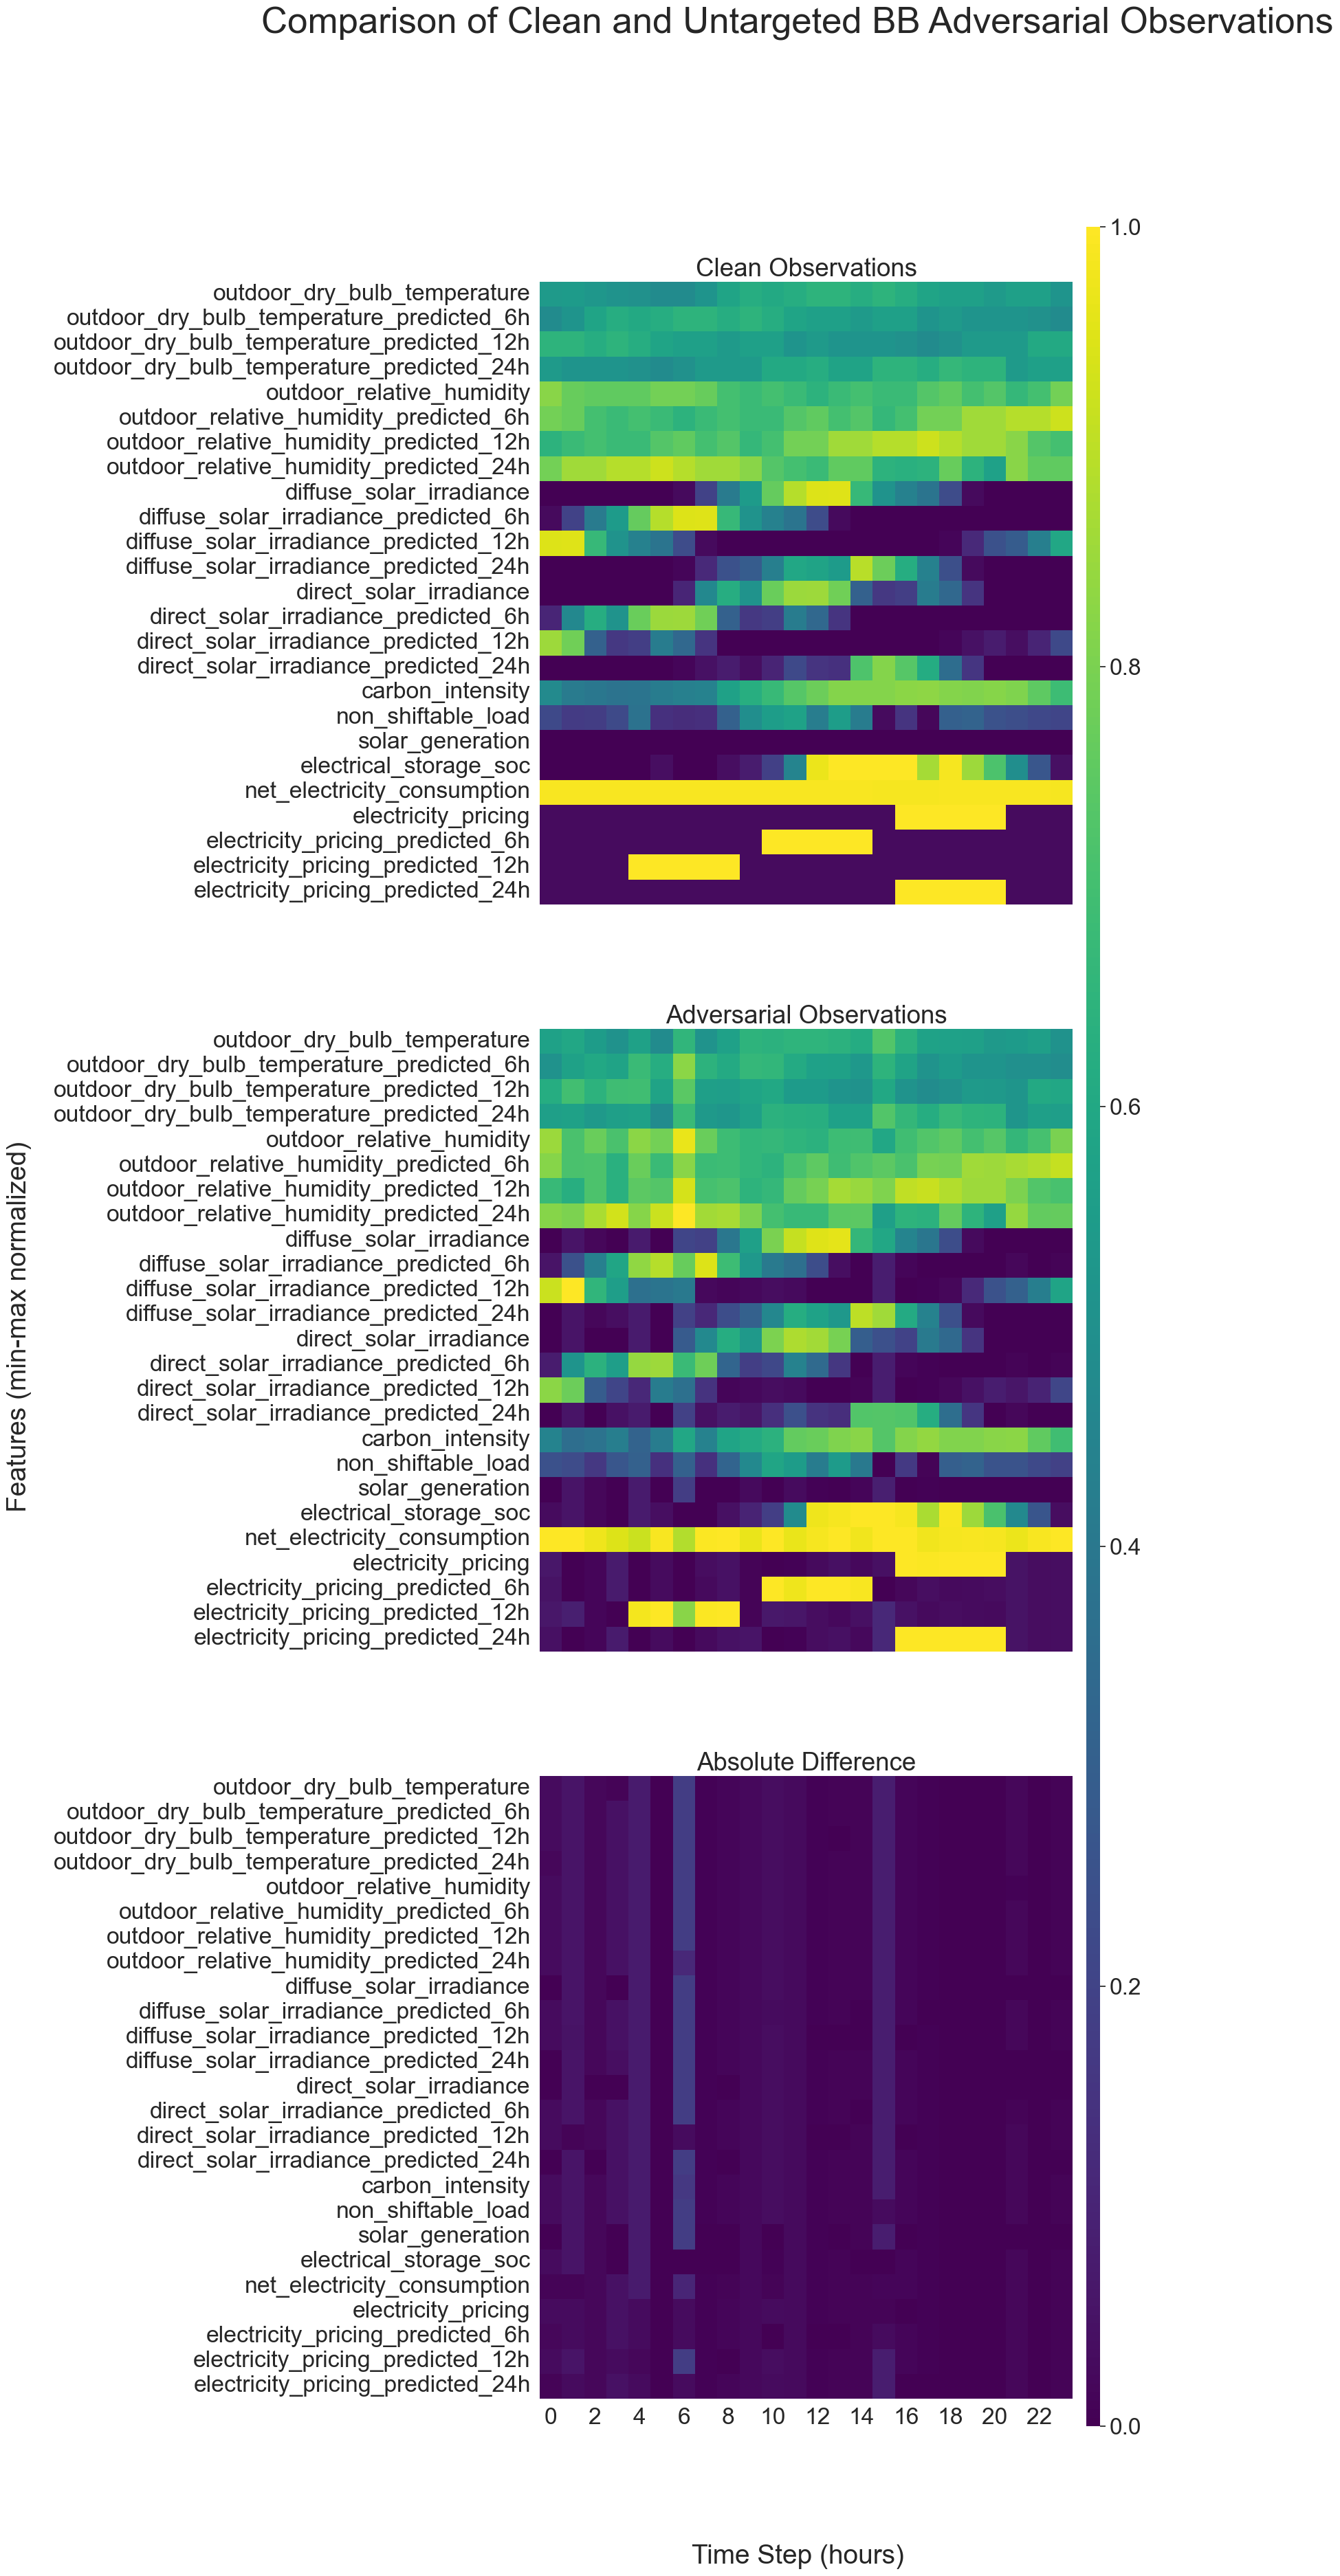

In [97]:
plot_columns(df_bb_clean[cols[6:]], df_bb_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Untargeted BB Adversarial Observations')

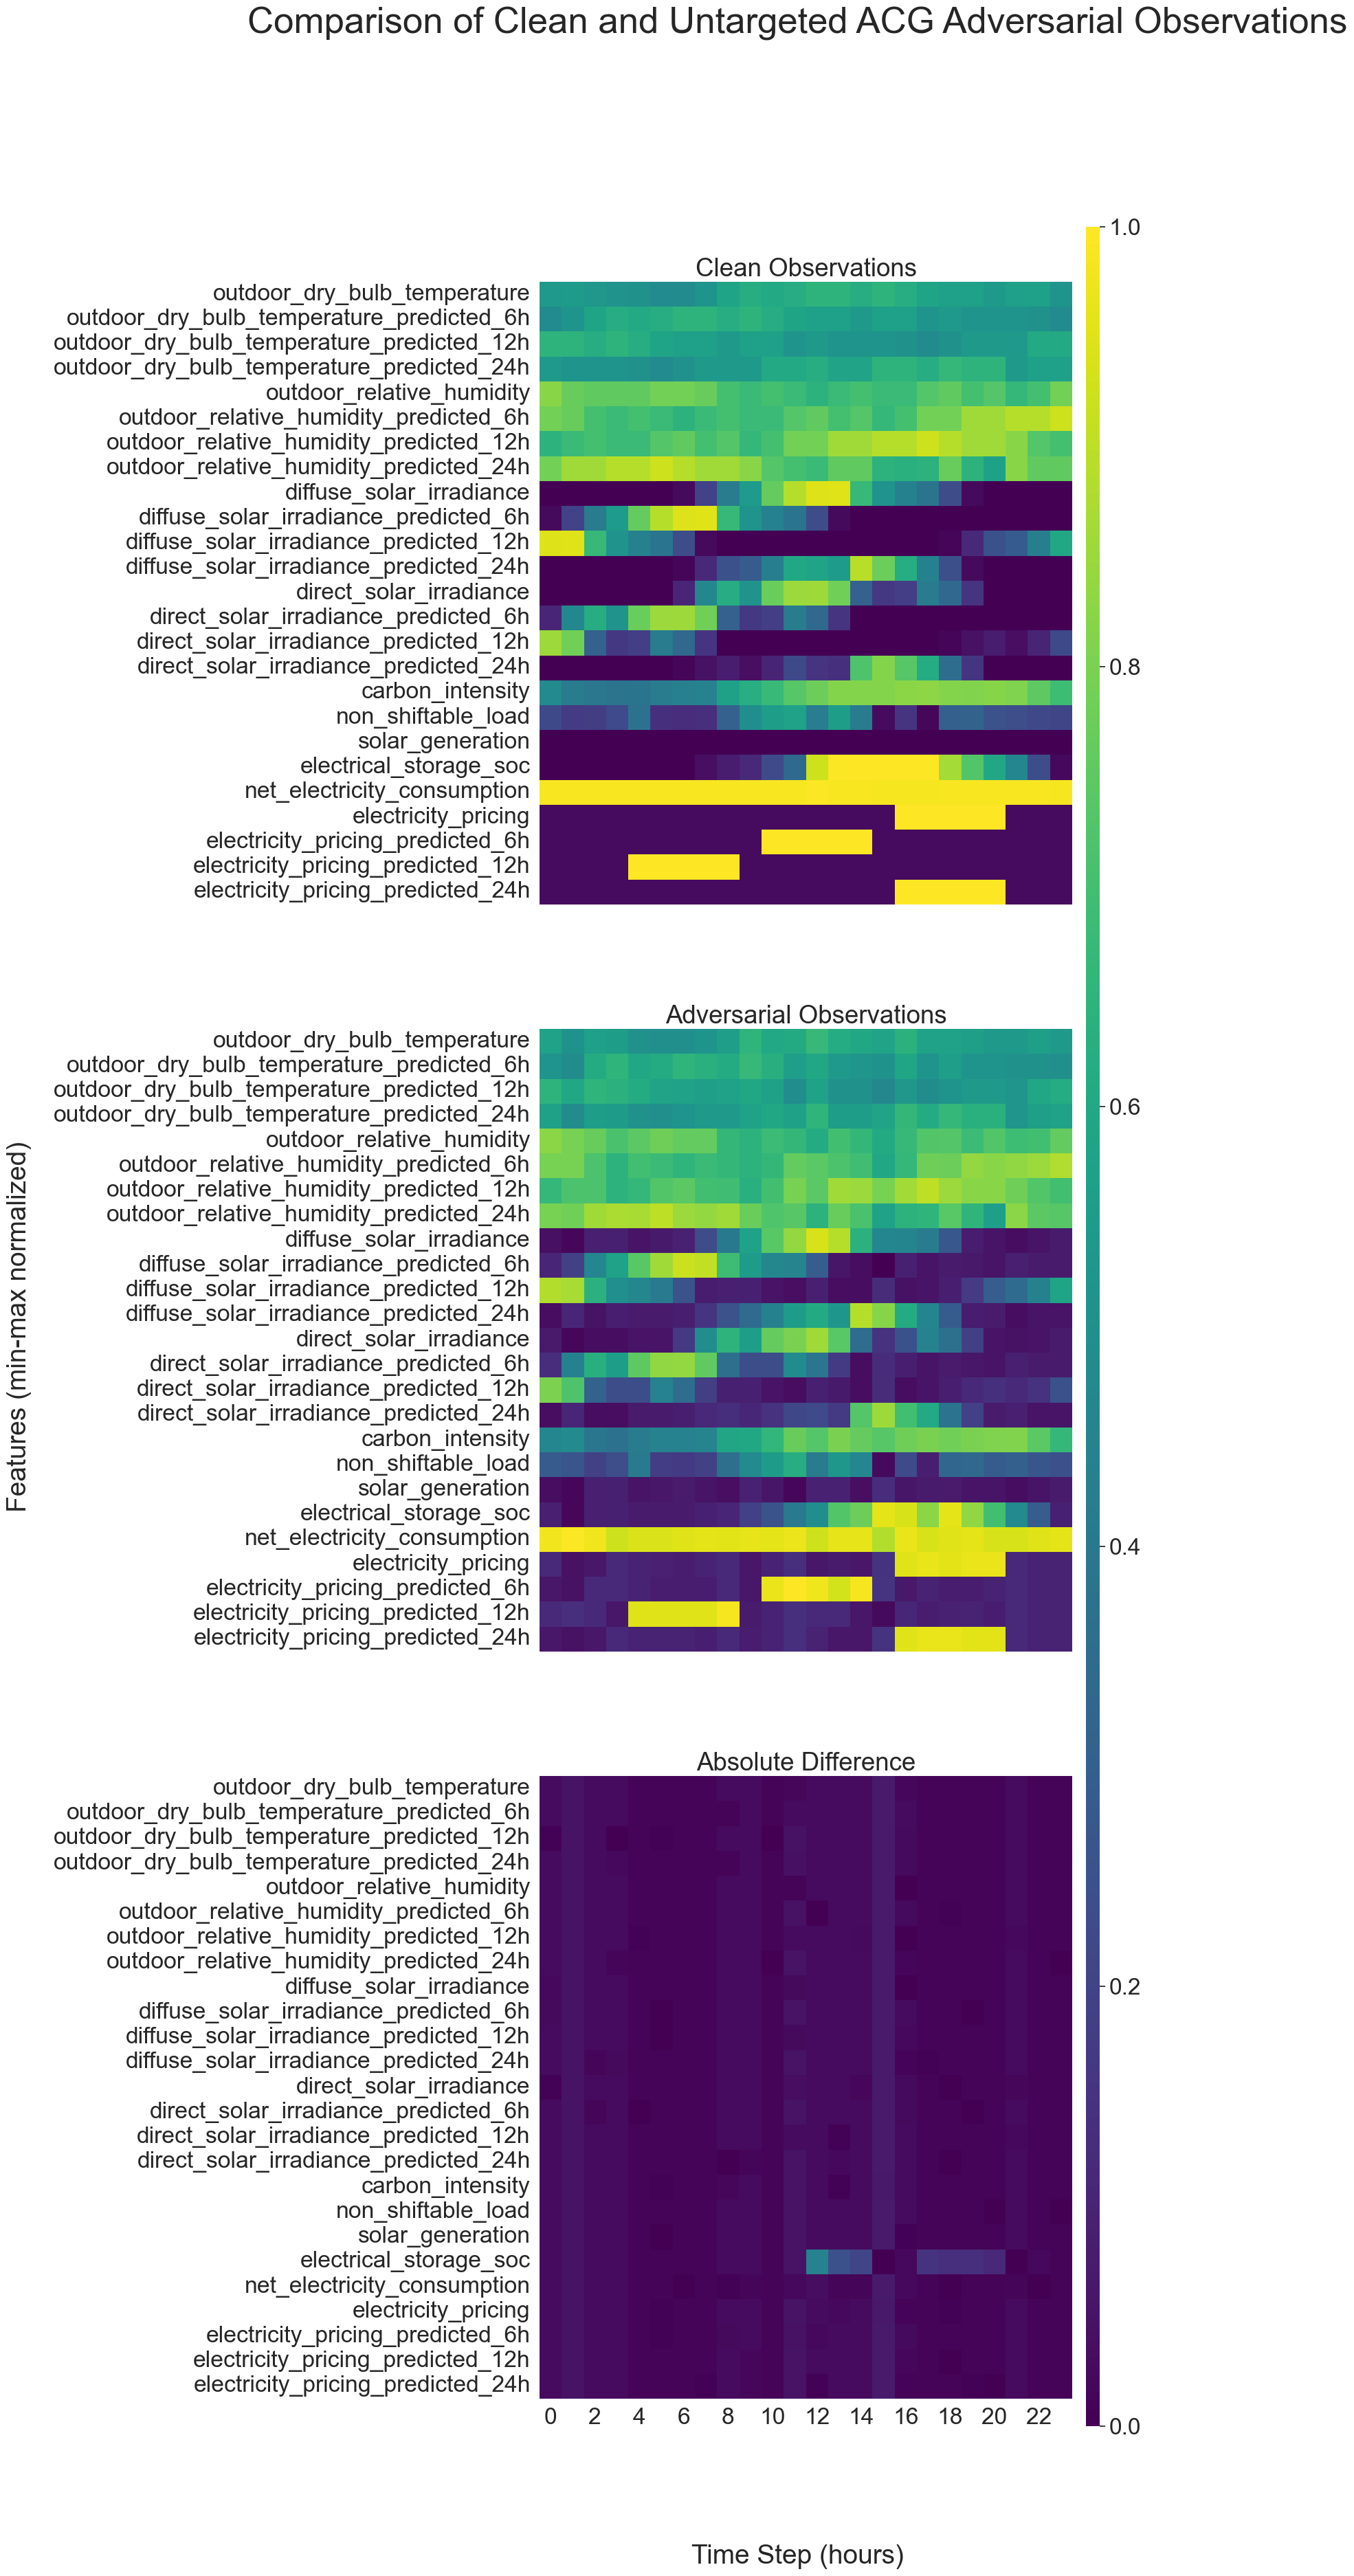

In [98]:
plot_columns(df_acg_clean[cols[6:]], df_acg_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Untargeted ACG Adversarial Observations')

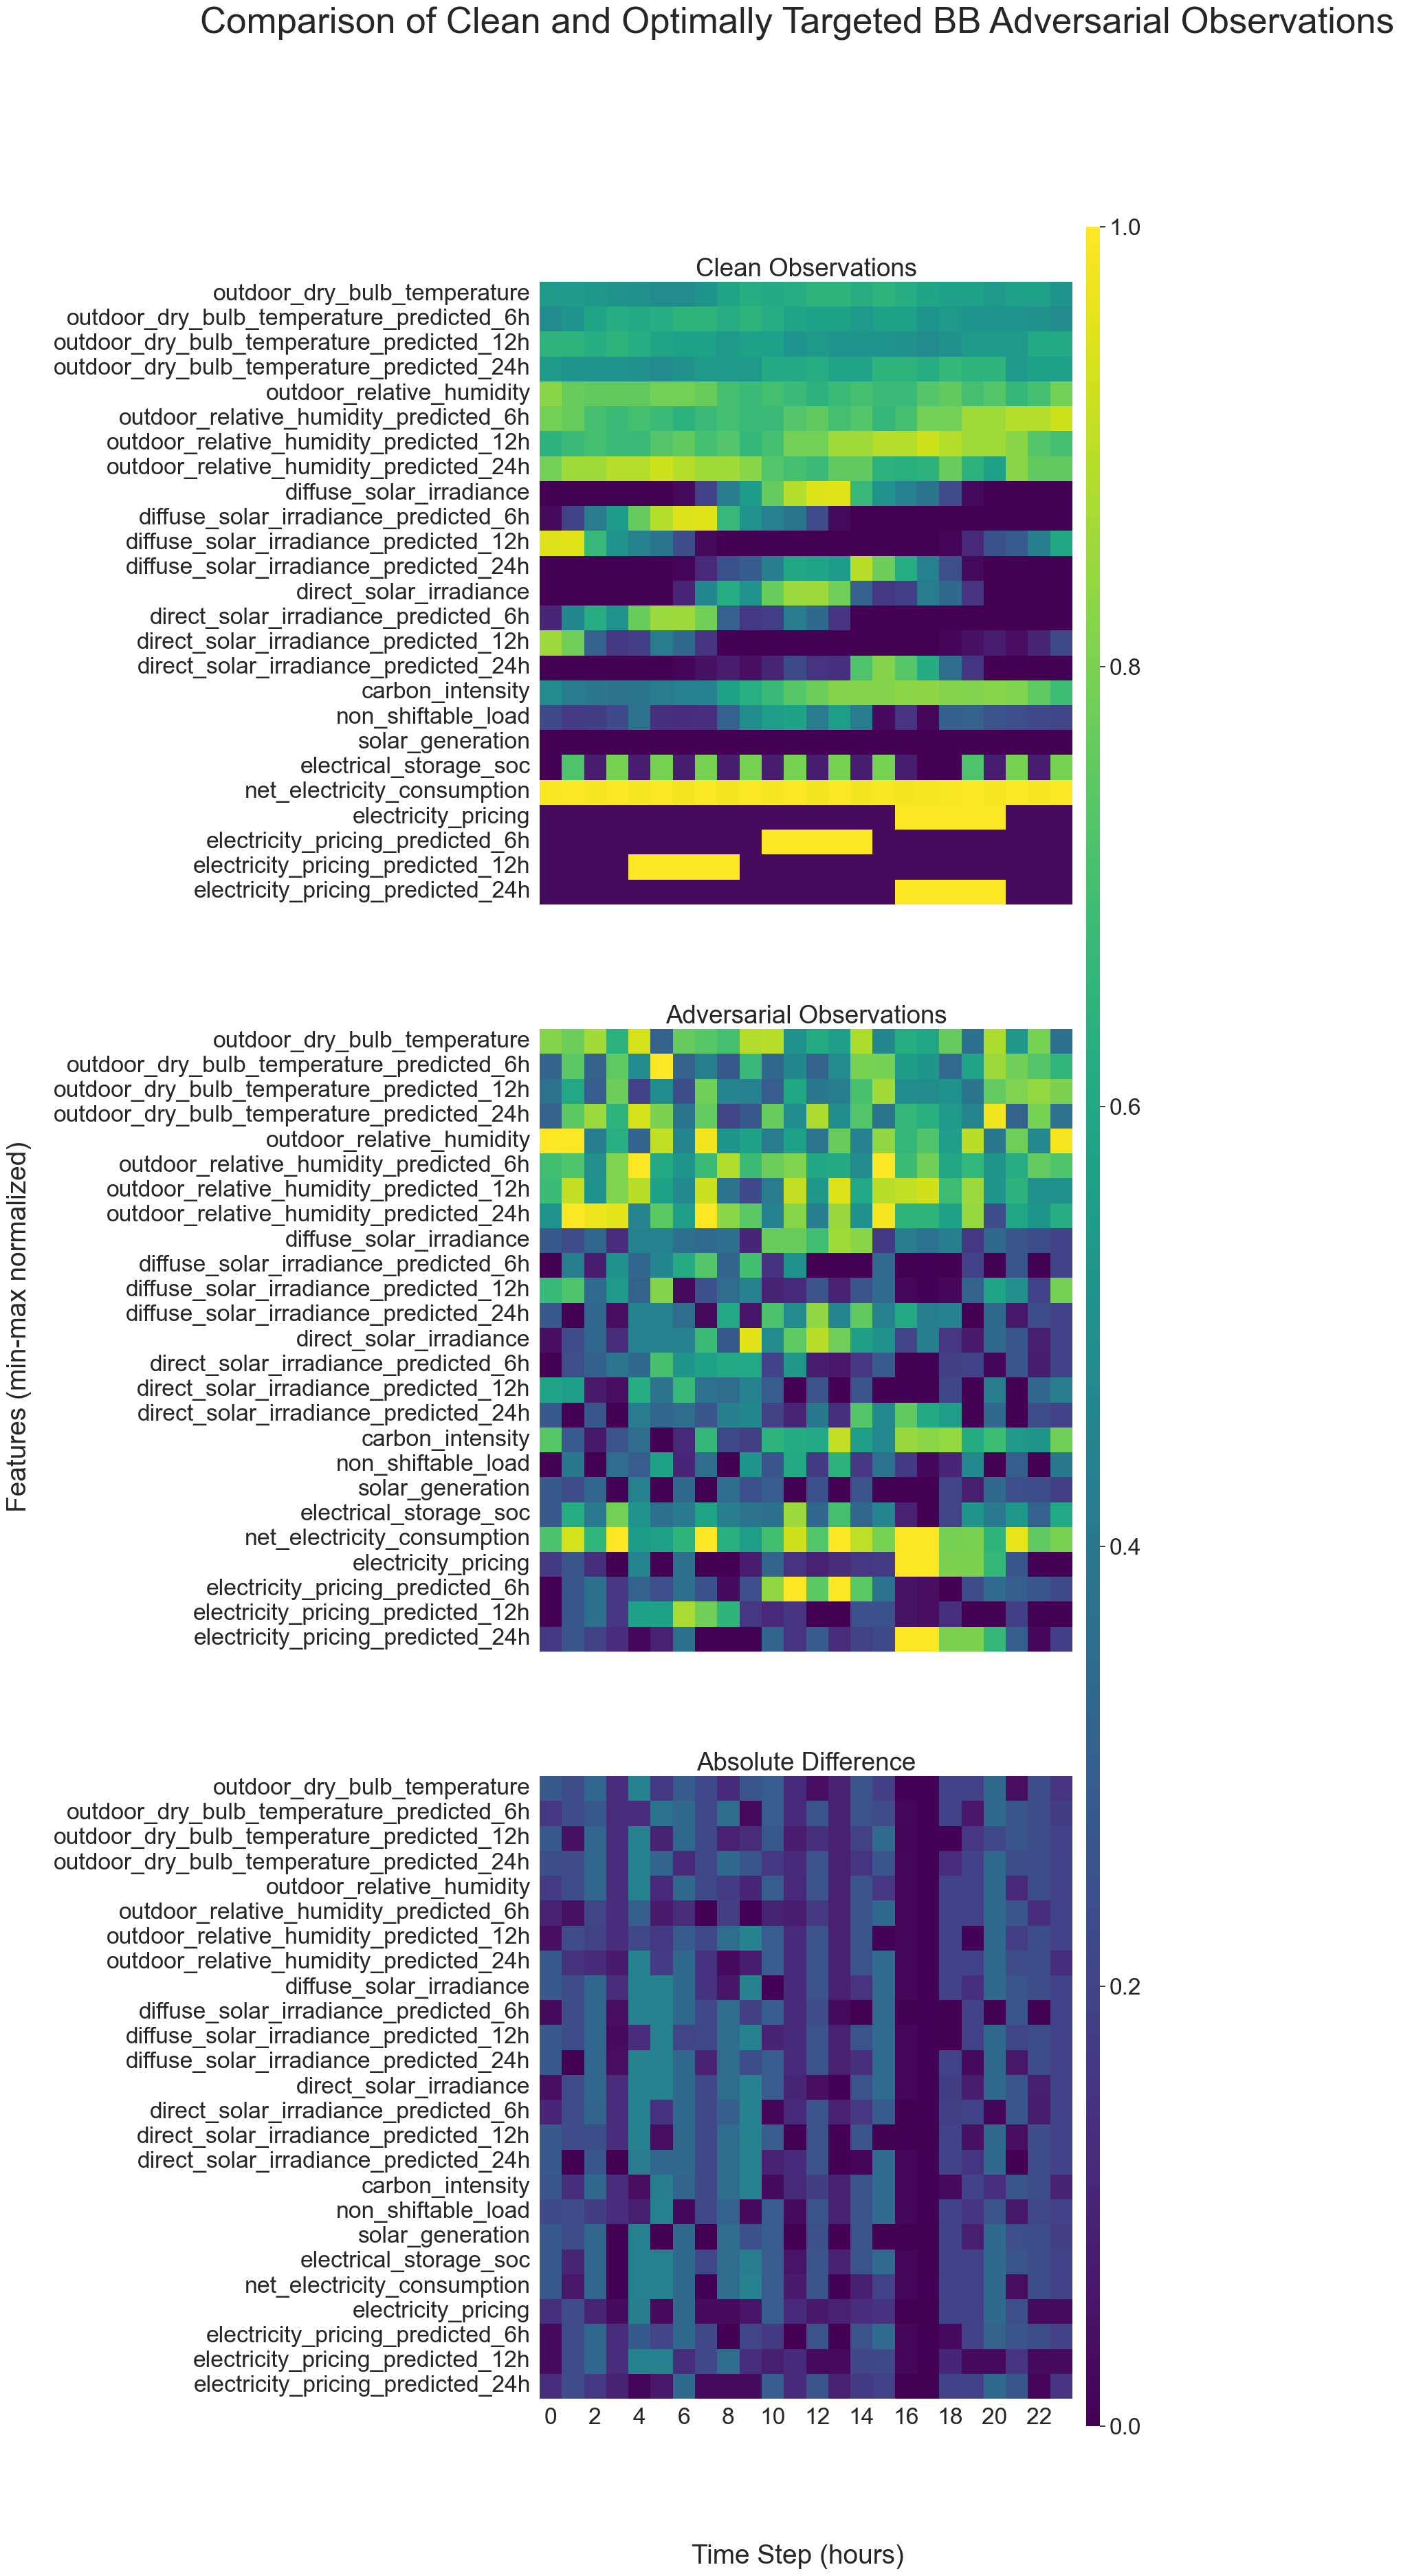

In [99]:
plot_columns(df_optimal_clean[cols[6:]], df_optimal_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Optimally Targeted BB Adversarial Observations')

In [89]:
def plot_rows_transpose(df1, df2, row_ids, title='Comparison of Clean and Adversarial Observations', fig_size:tuple=(50,15)):


    fig, axs = plt.subplots(1, 3, 
                            figsize=fig_size,
                            sharex=True, 
                            sharey=True,
                            )
    df_diff = (df1 - df2).abs()

    # Plot row from df1
    sns.heatmap(df1.iloc[row_ids].T, 
                ax=axs[0], 
                cmap='viridis',
                cbar=False)
    axs[0].set_title('Clean Observations')

    # Plot row from df2
    sns.heatmap(df2.iloc[row_ids].T, 
                ax=axs[1], 
                cmap='viridis',
                cbar=False
                )
    axs[1].set_title('Adversarial Observations')

    # Plot the difference
    sns.heatmap(df_diff.iloc[row_ids].T, 
                ax=axs[2], 
                cmap='viridis',
                vmin=0, 
                vmax=1,
                )
    axs[2].set_title('Absolute Difference')

    fig.text(0.5, -0.02, 'Time Step (hours)', ha='center', fontdict={'size':22})
    fig.text(-0.03, 0.5, 'Features (min-max normalized)', va='center', rotation='vertical', fontdict={'size':22})
    fig.suptitle(title,
                 fontsize='x-large')    
    plt.show()

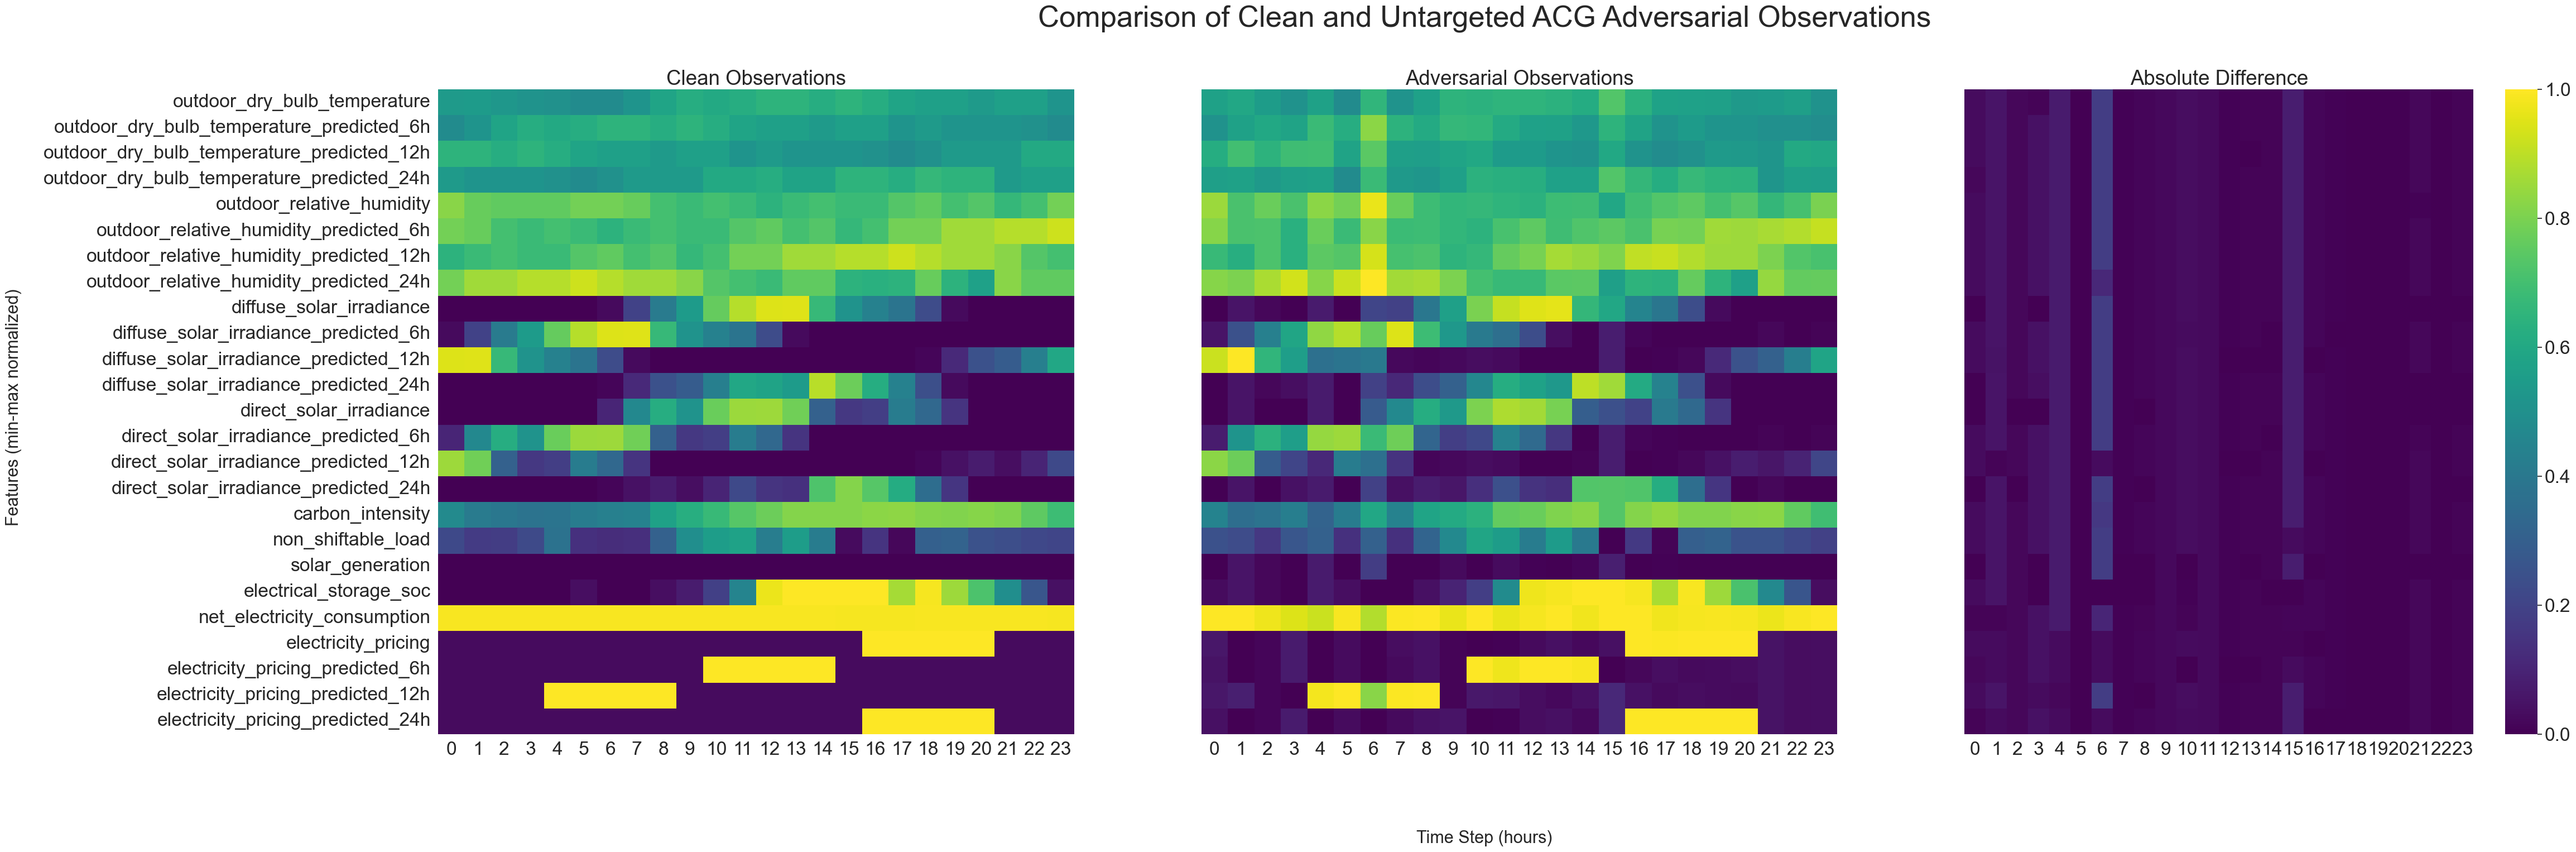

In [90]:
plot_rows_transpose(df_bb_clean[cols[6:]], df_bb_adv[cols[6:]], range(0,24),
            title='Comparison of Clean and Untargeted ACG Adversarial Observations')